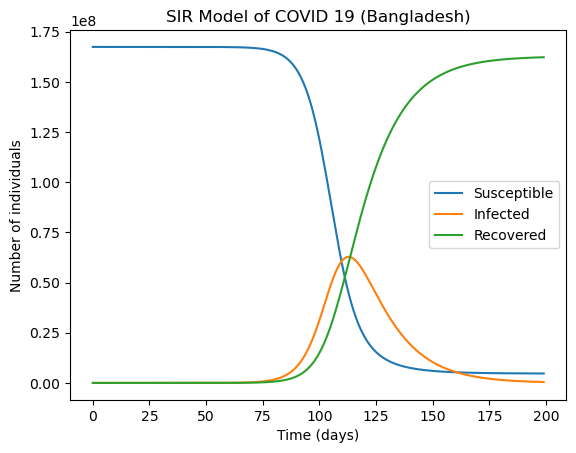

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial conditions
total_population = 167420951 # Total population of Bangladesh in 2020
initial_infected = 3          # Initial number of infected individuals
initial_recovered = 0         # Initial number of recovered individuals
initial_deaths = 0          # Initial number of deaths individuals
initial_susceptible = total_population - initial_infected - initial_recovered - initial_deaths

# Define the model parameters
beta = 0.25 # Transmission rate
gamma = 0.07 # Recovery rate
t_max = 200 # Maximum time to simulate (days)

# Define the time grid
t = np.arange(t_max)

# Define the SIR model
def sir_model(S, I, R, beta, gamma, N):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Simulate the model
S = np.zeros(t_max)
I = np.zeros(t_max)
R = np.zeros(t_max)
S[0] = initial_susceptible
I[0] = initial_infected
R[0] = initial_recovered

for i in range(1, t_max):
    dSdt, dIdt, dRdt = sir_model(S[i-1], I[i-1], R[i-1], beta, gamma, total_population)
    S[i] = S[i-1] + dSdt
    I[i] = I[i-1] + dIdt
    R[i] = R[i-1] + dRdt

# Plot the results
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('SIR Model of COVID 19 (Bangladesh)')
plt.legend()
plt.show()

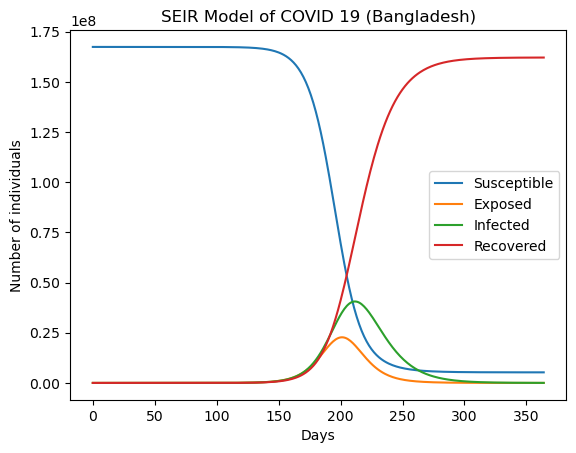

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# set model parameters
N = 167420951          # total population
I0 = 3                 # initial number of infected individuals
E0 = 2.1333            # initial number of Exposed individuals
R0 = 0                 # initial number of recovered individuals
S0 = N-I0-E0-R0        # initial number of susceptible individuals
beta = 0.25           # infection rate
gamma = 0.07          # recovery rate
sigma = 0.1515         # rate of progression from exposed to infectious

# define SEIR function
def SEIR_model(y, t, beta, gamma, sigma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# set initial conditions
y0 = S0, 0, I0, R0

# set time points
t = np.arange(365)

# solve SEIR model
from scipy.integrate import odeint
sol = odeint(SEIR_model, y0, t, args=(beta, gamma, sigma))

# plot the results
plt.plot(t, sol[:, 0], label='Susceptible')
plt.plot(t, sol[:, 1], label='Exposed')
plt.plot(t, sol[:, 2], label='Infected')
plt.plot(t, sol[:, 3], label='Recovered')
plt.xlabel('Days')
plt.ylabel('Number of individuals')
plt.title('SEIR Model of COVID 19 (Bangladesh)')
plt.legend()
plt.show()

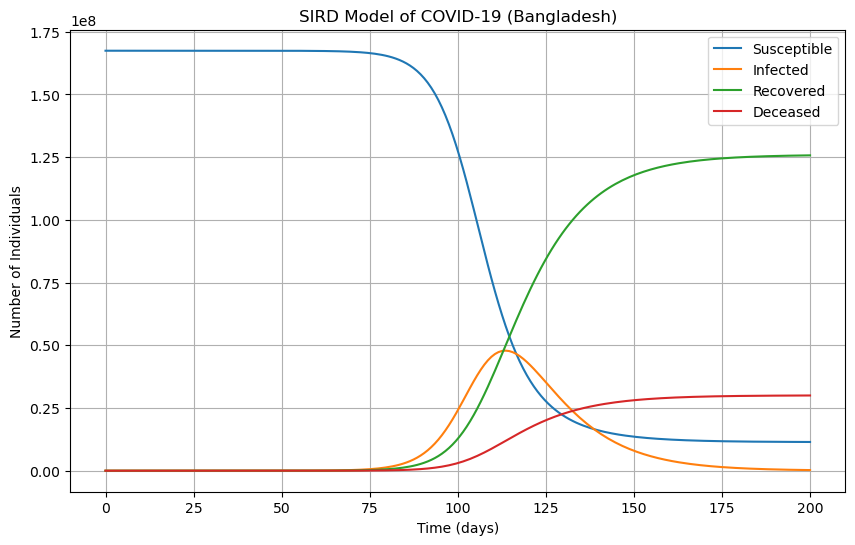

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set the initial conditions
N = 167420951  # Population of Bangladesh
I0 = 3  # Initial number of infected individuals
R0 = 0  # Initial number of recovered individuals
D0 = 0  # Initial number of deceased individuals
S0 = N - I0 - R0 - D0  # Initial number of susceptible individuals

# Set the model parameters
beta = 0.25  # Transmission rate
gamma = 0.07  # Recovery rate
mu = 0.0167  # Mortality rate

# Set the time points to simulate
t = np.linspace(0, 200, 200)  # Simulate for 365 days

# Define the SIRD model equations
def sird_model(y, t, N, beta, gamma, mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

# Solve the SIRD model equations
y0 = S0, I0, R0, D0
sol = odeint(sird_model, y0, t, args=(N, beta, gamma, mu))
S, I, R, D = sol[:, 0], sol[:, 1], sol[:, 2], sol[:, 3]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.plot(t, D, label='Deceased')
plt.xlabel('Time (days)')
plt.ylabel('Number of Individuals')
plt.title('SIRD Model of COVID-19 (Bangladesh)')
plt.legend()
plt.grid(True)
plt.show()